In [10]:
import pickle
# Check epoch info 
"""with open('epoch/Unet_epoch.pk', 'rb') as f:
    Unet_epoch = pickle.load(f)
with open('epoch/Unet_lr.pk', 'rb') as f:
    Unet_lr = pickle.load(f)
print(Unet_epoch, Unet_lr)"""

"with open('epoch/Unet_epoch.pk', 'rb') as f:\n    Unet_epoch = pickle.load(f)\nwith open('epoch/Unet_lr.pk', 'rb') as f:\n    Unet_lr = pickle.load(f)\nprint(Unet_epoch, Unet_lr)"

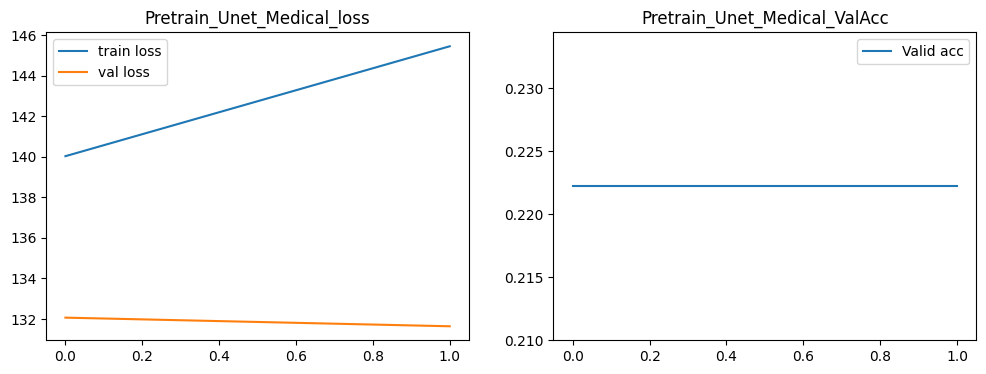

In [11]:
import pickle
import matplotlib.pyplot as plt

conformer = False
mix_image_mask = False
add_noise_ = False

if conformer:
    model_name = 'Conformer-Unet'
else:
    model_name = 'Unet'    
model_name = 'Pretrain_Unet_Medical'

if mix_image_mask:
    model_name += '-mix'
    add_times = 5
if add_noise_:
    model_name += '-noise'
    add_times = 5


with open(f'result/{model_name}_hist.pk', 'rb') as f:
    hist = pickle.load(f)
loss_train = hist['loss train']
loss_val = hist['loss val']
acc_val = hist['acc val']

plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(loss_train, label='train loss')
plt.plot(loss_val, label='val loss')
plt.title(f'{model_name}_loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc_val, label='Valid acc')
plt.title(f'{model_name}_ValAcc')
plt.legend()

plt.savefig(f'result/{model_name}_loss_acc.png')

plt.show()


In [12]:
from torch.utils.data import Dataset, DataLoader
class Dataset_(Dataset):
    def __init__(self, data):
        self.img = data[0]  # Assuming 'data' is a list of tuples (images, labels)
        self.label = data[1]
        self.tumormask = data[2]

    def __len__(self):
        return len(self.img)

    def __getitem__(self, idx):
        return self.img[idx], self.label[idx], self.tumormask[idx]
    
with open('./temp/testdataset.pk', 'rb') as f:
    testset = pickle.load(f)
testloader = DataLoader(testset, batch_size=16, shuffle=False)

In [13]:
from model import *
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_path = f'checkpoint/{model_name}_best_model.pt'
model = Conformer_Unet(3, conformer).to(device)
model.load_state_dict(torch.load(model_path))

RuntimeError: Error(s) in loading state_dict for Conformer_Unet:
	Missing key(s) in state_dict: "transconv5.weight", "transconv5.bias", "transconv4.weight", "transconv4.bias", "transconv3.weight", "transconv3.bias", "transconv2.weight", "transconv2.bias", "transconv1.weight", "transconv1.bias", "transbn5.weight", "transbn5.bias", "transbn5.running_mean", "transbn5.running_var", "transbn4.weight", "transbn4.bias", "transbn4.running_mean", "transbn4.running_var", "transbn3.weight", "transbn3.bias", "transbn3.running_mean", "transbn3.running_var", "transbn2.weight", "transbn2.bias", "transbn2.running_mean", "transbn2.running_var", "transbn1.weight", "transbn1.bias", "transbn1.running_mean", "transbn1.running_var", "ln1.weight", "ln1.bias". 
	Unexpected key(s) in state_dict: "conv_channel1to3.weight", "conv_channel1to3.bias", "ln_channel1to3.weight", "ln_channel1to3.bias", "pretrain.encoder1.enc1conv1.weight", "pretrain.encoder1.enc1norm1.weight", "pretrain.encoder1.enc1norm1.bias", "pretrain.encoder1.enc1norm1.running_mean", "pretrain.encoder1.enc1norm1.running_var", "pretrain.encoder1.enc1norm1.num_batches_tracked", "pretrain.encoder1.enc1conv2.weight", "pretrain.encoder1.enc1norm2.weight", "pretrain.encoder1.enc1norm2.bias", "pretrain.encoder1.enc1norm2.running_mean", "pretrain.encoder1.enc1norm2.running_var", "pretrain.encoder1.enc1norm2.num_batches_tracked", "pretrain.encoder2.enc2conv1.weight", "pretrain.encoder2.enc2norm1.weight", "pretrain.encoder2.enc2norm1.bias", "pretrain.encoder2.enc2norm1.running_mean", "pretrain.encoder2.enc2norm1.running_var", "pretrain.encoder2.enc2norm1.num_batches_tracked", "pretrain.encoder2.enc2conv2.weight", "pretrain.encoder2.enc2norm2.weight", "pretrain.encoder2.enc2norm2.bias", "pretrain.encoder2.enc2norm2.running_mean", "pretrain.encoder2.enc2norm2.running_var", "pretrain.encoder2.enc2norm2.num_batches_tracked", "pretrain.encoder3.enc3conv1.weight", "pretrain.encoder3.enc3norm1.weight", "pretrain.encoder3.enc3norm1.bias", "pretrain.encoder3.enc3norm1.running_mean", "pretrain.encoder3.enc3norm1.running_var", "pretrain.encoder3.enc3norm1.num_batches_tracked", "pretrain.encoder3.enc3conv2.weight", "pretrain.encoder3.enc3norm2.weight", "pretrain.encoder3.enc3norm2.bias", "pretrain.encoder3.enc3norm2.running_mean", "pretrain.encoder3.enc3norm2.running_var", "pretrain.encoder3.enc3norm2.num_batches_tracked", "pretrain.encoder4.enc4conv1.weight", "pretrain.encoder4.enc4norm1.weight", "pretrain.encoder4.enc4norm1.bias", "pretrain.encoder4.enc4norm1.running_mean", "pretrain.encoder4.enc4norm1.running_var", "pretrain.encoder4.enc4norm1.num_batches_tracked", "pretrain.encoder4.enc4conv2.weight", "pretrain.encoder4.enc4norm2.weight", "pretrain.encoder4.enc4norm2.bias", "pretrain.encoder4.enc4norm2.running_mean", "pretrain.encoder4.enc4norm2.running_var", "pretrain.encoder4.enc4norm2.num_batches_tracked", "pretrain.bottleneck.bottleneckconv1.weight", "pretrain.bottleneck.bottlenecknorm1.weight", "pretrain.bottleneck.bottlenecknorm1.bias", "pretrain.bottleneck.bottlenecknorm1.running_mean", "pretrain.bottleneck.bottlenecknorm1.running_var", "pretrain.bottleneck.bottlenecknorm1.num_batches_tracked", "pretrain.bottleneck.bottleneckconv2.weight", "pretrain.bottleneck.bottlenecknorm2.weight", "pretrain.bottleneck.bottlenecknorm2.bias", "pretrain.bottleneck.bottlenecknorm2.running_mean", "pretrain.bottleneck.bottlenecknorm2.running_var", "pretrain.bottleneck.bottlenecknorm2.num_batches_tracked", "pretrain.upconv4.weight", "pretrain.upconv4.bias", "pretrain.decoder4.dec4conv1.weight", "pretrain.decoder4.dec4norm1.weight", "pretrain.decoder4.dec4norm1.bias", "pretrain.decoder4.dec4norm1.running_mean", "pretrain.decoder4.dec4norm1.running_var", "pretrain.decoder4.dec4norm1.num_batches_tracked", "pretrain.decoder4.dec4conv2.weight", "pretrain.decoder4.dec4norm2.weight", "pretrain.decoder4.dec4norm2.bias", "pretrain.decoder4.dec4norm2.running_mean", "pretrain.decoder4.dec4norm2.running_var", "pretrain.decoder4.dec4norm2.num_batches_tracked", "pretrain.upconv3.weight", "pretrain.upconv3.bias", "pretrain.decoder3.dec3conv1.weight", "pretrain.decoder3.dec3norm1.weight", "pretrain.decoder3.dec3norm1.bias", "pretrain.decoder3.dec3norm1.running_mean", "pretrain.decoder3.dec3norm1.running_var", "pretrain.decoder3.dec3norm1.num_batches_tracked", "pretrain.decoder3.dec3conv2.weight", "pretrain.decoder3.dec3norm2.weight", "pretrain.decoder3.dec3norm2.bias", "pretrain.decoder3.dec3norm2.running_mean", "pretrain.decoder3.dec3norm2.running_var", "pretrain.decoder3.dec3norm2.num_batches_tracked", "pretrain.upconv2.weight", "pretrain.upconv2.bias", "pretrain.decoder2.dec2conv1.weight", "pretrain.decoder2.dec2norm1.weight", "pretrain.decoder2.dec2norm1.bias", "pretrain.decoder2.dec2norm1.running_mean", "pretrain.decoder2.dec2norm1.running_var", "pretrain.decoder2.dec2norm1.num_batches_tracked", "pretrain.decoder2.dec2conv2.weight", "pretrain.decoder2.dec2norm2.weight", "pretrain.decoder2.dec2norm2.bias", "pretrain.decoder2.dec2norm2.running_mean", "pretrain.decoder2.dec2norm2.running_var", "pretrain.decoder2.dec2norm2.num_batches_tracked", "pretrain.upconv1.weight", "pretrain.upconv1.bias", "pretrain.decoder1.dec1conv1.weight", "pretrain.decoder1.dec1norm1.weight", "pretrain.decoder1.dec1norm1.bias", "pretrain.decoder1.dec1norm1.running_mean", "pretrain.decoder1.dec1norm1.running_var", "pretrain.decoder1.dec1norm1.num_batches_tracked", "pretrain.decoder1.dec1conv2.weight", "pretrain.decoder1.dec1norm2.weight", "pretrain.decoder1.dec1norm2.bias", "pretrain.decoder1.dec1norm2.running_mean", "pretrain.decoder1.dec1norm2.running_var", "pretrain.decoder1.dec1norm2.num_batches_tracked", "pretrain.conv.weight", "pretrain.conv.bias". 

In [ ]:
from torchvision.utils import save_image
from tqdm import tqdm
from util import *

with torch.no_grad():
    model.eval()
    pred_m_all, true_m_all = [], []
    loss_e_val = 0
    acc = 0
    for i, l, m in tqdm(testloader):
        i, l_one, m = process(i, l, m)    
        loss, pred_m, out = forward(model, i, l_one, m)
        loss_e_val += loss.item()
        pred_m_all.append(pred_m)
        true_m_all.append(m)
        acc += (torch.argmax(out, dim=1) == (l-1).reshape(-1)).sum().item()
        
    acc = acc/len(testloader.dataset)
print(acc)
pred_m_all, true_m_all = torch.cat(pred_m_all), torch.cat(true_m_all)
save_image(torch.cat([pred_m_all[:32], true_m_all[:32]], dim = 0), f'result/{model_name}_ground_prediction.png', nrow=8)


100%|██████████| 20/20 [00:00<00:00, 37.55it/s]


0.46905537459283386
